In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
!pip install fbprophet
import fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\nikhil\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Nikhil\\AppData\\Local\\Temp\\pip-install-wh7bp533\\fbprophet_d33a30f2f1b34dd4bf98c480c39902e3\\setup.py'"'"'; __file__='"'"'C:\\Users\\Nikhil\\AppData\\Local\\Temp\\pip-install-wh7bp533\\fbprophet_d33a30f2f1b34dd4bf98c480c39902e3\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Nikhil\AppData\Local\Temp\pip-wheel-k1e5nka0'
       cwd: C:\Users\Nikhil\AppData\Local\Temp\pip-install-wh7bp533\fbprophet_d33a30f2f1b34dd4bf98c480c39902e3\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR 

ModuleNotFoundError: No module named 'fbprophet'

In [3]:

data = pd.read_csv("eth daily data.csv")
data.set_index('Date', drop=True, inplace=True)
data.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
08-08-2015,1,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,674188,45486894.24
09-08-2015,2,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,532170,42399573.50
10-08-2015,3,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,405283,42818364.39
11-08-2015,4,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1463100,64569288.43
12-08-2015,5,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2150620,73645010.99


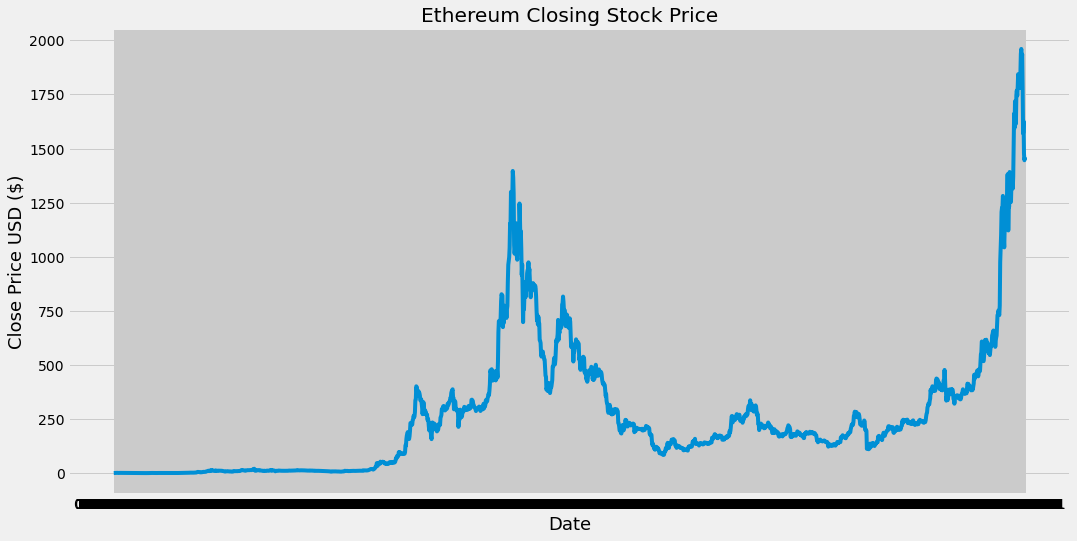

In [4]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Ethereum Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [5]:
eth = data[["Close"]]

print(eth.head())

               Close
Date                
08-08-2015  0.753325
09-08-2015  0.701897
10-08-2015  0.708448
11-08-2015  1.067860
12-08-2015  1.217440


In [6]:
futureDays = 120

In [7]:
eth["Prediction"] = eth[["Close"]].shift(-futureDays)
#print(eth.head(20))
print(eth.tail(40))
print(eth)
eth.describe(include='all')

# since we dont have a prediction attribute to test the model we're creating one by shifting the "close" attribute to 30 days in advanced

                  Close  Prediction
Date                               
19-01-2021  1377.295842         NaN
20-01-2021  1382.274094         NaN
21-01-2021  1121.570920         NaN
22-01-2021  1236.512207         NaN
23-01-2021  1230.990636         NaN
24-01-2021  1391.609408         NaN
25-01-2021  1324.414778         NaN
26-01-2021  1357.058140         NaN
27-01-2021  1253.187133         NaN
28-01-2021  1332.492245         NaN
29-01-2021  1382.522812         NaN
30-01-2021  1376.115539         NaN
31-01-2021  1314.986229         NaN
01-02-2021  1369.040469         NaN
02-02-2021  1515.193770         NaN
03-02-2021  1660.909542         NaN
04-02-2021  1594.762694         NaN
05-02-2021  1718.650872         NaN
06-02-2021  1677.846847         NaN
07-02-2021  1614.227823         NaN
08-02-2021  1746.616849         NaN
09-02-2021  1768.035017         NaN
10-02-2021  1744.243432         NaN
11-02-2021  1783.797950         NaN
12-02-2021  1843.532588         NaN
13-02-2021  1814.109853     

<ipython-input-7-90360f925a50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth["Prediction"] = eth[["Close"]].shift(-futureDays)


,Close,Prediction
count,2031.000000,1911.000000
mean,258.142275,274.293258
std,309.321155,311.887135
min,0.434829,0.792167
25%,12.866100,44.499149
50%,185.028722,197.556000
75%,333.370499,350.060872
max,1960.164744,1960.164744


In [8]:
import numpy as np
x = np.array(eth.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[  0.75332499]
 [  0.70189702]
 [  0.70844799]
 ...
 [388.6507707 ]
 [386.7301135 ]
 [382.819992  ]]


In [9]:
y = np.array(eth["Prediction"])[:-futureDays]
print(y)

[8.35500002e-01 8.11263978e-01 8.22117984e-01 ... 1.47570374e+03
 1.44603365e+03 1.45997312e+03]


In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)


print(xtrain)

[[286.9500122 ]
 [  0.93600303]
 [  9.48293018]
 ...
 [150.3596334 ]
 [  7.92133999]
 [ 10.25440025]]


In [11]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

#using the support vector model

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
svmReg = regressor.fit(xtrain,ytrain)

In [12]:
xfuture = eth.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[225.3870633]
 [229.0741123]
 [227.6645987]
 [241.5102251]
 [239.0755283]
 [246.6700154]
 [243.0159678]
 [240.9849852]
 [239.4581769]
 [242.1316952]
 [239.6045848]
 [240.2114942]
 [238.4235269]
 [233.640883 ]
 [232.7730856]
 [235.4838052]
 [238.4875237]
 [236.1531677]
 [245.0167285]
 [262.1906563]
 [274.689049 ]
 [279.2154095]
 [304.0567612]
 [309.6436093]
 [321.5140882]
 [316.6572523]
 [318.1908844]
 [334.5866293]
 [345.5546493]
 [385.1997193]
 [370.6717115]
 [386.2951734]
 [389.8754851]
 [401.5905863]
 [394.9619571]
 [379.512855 ]
 [393.9873761]
 [391.1204549]
 [395.8875695]
 [380.3840683]
 [391.0241621]
 [428.7417823]
 [437.3978395]
 [433.3549265]
 [433.78661  ]
 [429.5312523]
 [423.6693157]
 [406.4637868]
 [416.4397949]
 [389.1263503]
 [395.8351412]
 [391.3844998]
 [408.1442071]
 [384.001043 ]
 [386.4661242]
 [382.6326321]
 [395.8746661]
 [399.921471 ]
 [428.3957176]
 [435.0797453]
 [477.0519242]
 [440.0405069]
 [385.6719284]
 [388.2411404]
 [335.2600791]
 [353.3622657]
 [352.6734

In [13]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [ 386.5903353  185.1192355  383.1567326  180.7105063  402.1419984
  414.0673382  454.7192903  435.7131351  449.6796211  352.5790067
  449.6796211  462.9605277  459.9403126  474.6264209  106.5899768
  447.5590953  459.9403126  413.7729927  479.4840698  471.6304197
  509.7445733  549.4866209  558.0680952  608.4540286  826.822998
  570.6866162  518.8011739  517.4936877  538.2298006  575.7580479
  614.842522   587.3241871  598.3523422  616.7087549  569.3541975
  596.5954747  601.9089924  591.8433793  638.2908464  102.4755556
  559.6785011  545.797341   568.5673178  589.6632225  586.011152
  589.3556025  636.1818487  642.868967   420.747      659.2979265
  638.2908464  609.8178717  110.2141896  583.7145969  433.867
  626.4107016  638.2908464  682.6423591  730.3973648  731.5201187
  751.6189719  737.8033977  730.3675691 1768.035017   975.5076729
 1040.233048  1100.006099  1207.112234  1225.678135  1224.197145
 1281.077291  1262.246664  1090.145373  1043.434584  113

In [14]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [283.76467704 286.31589052 285.3405929  294.9209236  293.23626161
 298.49118442 295.9628059  294.55748956 293.50103115 295.35094308
 293.60233651 294.02228087 292.78511633 289.47581787 288.87535489
 290.75100785 292.82939822 291.21416596 297.34721052 309.2305232
 317.87865018 321.01061613 338.19931944 342.06507826 350.27872711
 346.9180923  347.97927236 359.32412984 366.91333207 394.34530735
 384.29281026 395.10329491 397.58065268 405.68678962 401.10018169
 390.41034341 400.42583096 398.442096   401.74064913 391.01316998
 398.37546724 424.47376459 430.46322928 427.66577958 427.96447828
 425.02002977 420.96392646 409.05874774 415.96153812 397.06229699
 401.70437194 398.624799   410.2214963  393.51589632 395.22158246
 392.56903927 401.73172077 404.53186343 424.23430888 428.8592492
 457.90144219 432.29179427 394.67204731 396.44978563 359.79011611
 372.31572738 371.83913984 361.41066025 370.75730802 382.51466204
 387.07708842 395.71769271 380.7627399  388.857

In [15]:
svmPrediction = svmReg.predict(xfuture)
print("SVM regression Prediction =",svmPrediction)

SVM regression Prediction = [253.14916633 256.14614847 255.00919586 265.69536765 263.89517866
 269.39638978 266.79149742 265.30991127 264.18037156 266.14937573
 264.28926818 264.73936236 263.40729387 259.75433208 259.07764279
 261.17733122 263.45528998 261.6894148  268.2275059  279.57356243
 286.70297838 289.04736668 299.66410926 301.53282874 304.88549933
 303.61431641 304.03065212 307.63116419 309.19947892 309.80142325
 310.44035506 309.71657507 309.40519925 308.03893029 308.87563308
 310.16114315 308.9848454  309.28490754 308.7685712  310.11495832
 309.29442979 303.10041266 301.09912503 302.05568185 301.95531832
 302.92531223 304.18723372 307.32363303 305.61431044 309.47461831
 308.77472172 309.25860963 307.05818938 309.88857858 309.70288935
 309.98073641 308.77008589 308.26474086 303.176675   301.65210201
 290.23740357 300.45449844 309.76545432 309.5537521  307.74645837
 309.92464172 309.87338766 308.12785021 309.7479946  310.45488502
 310.35664445 309.6441894  310.43891555 310.2649

<ipython-input-16-baa668e020e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


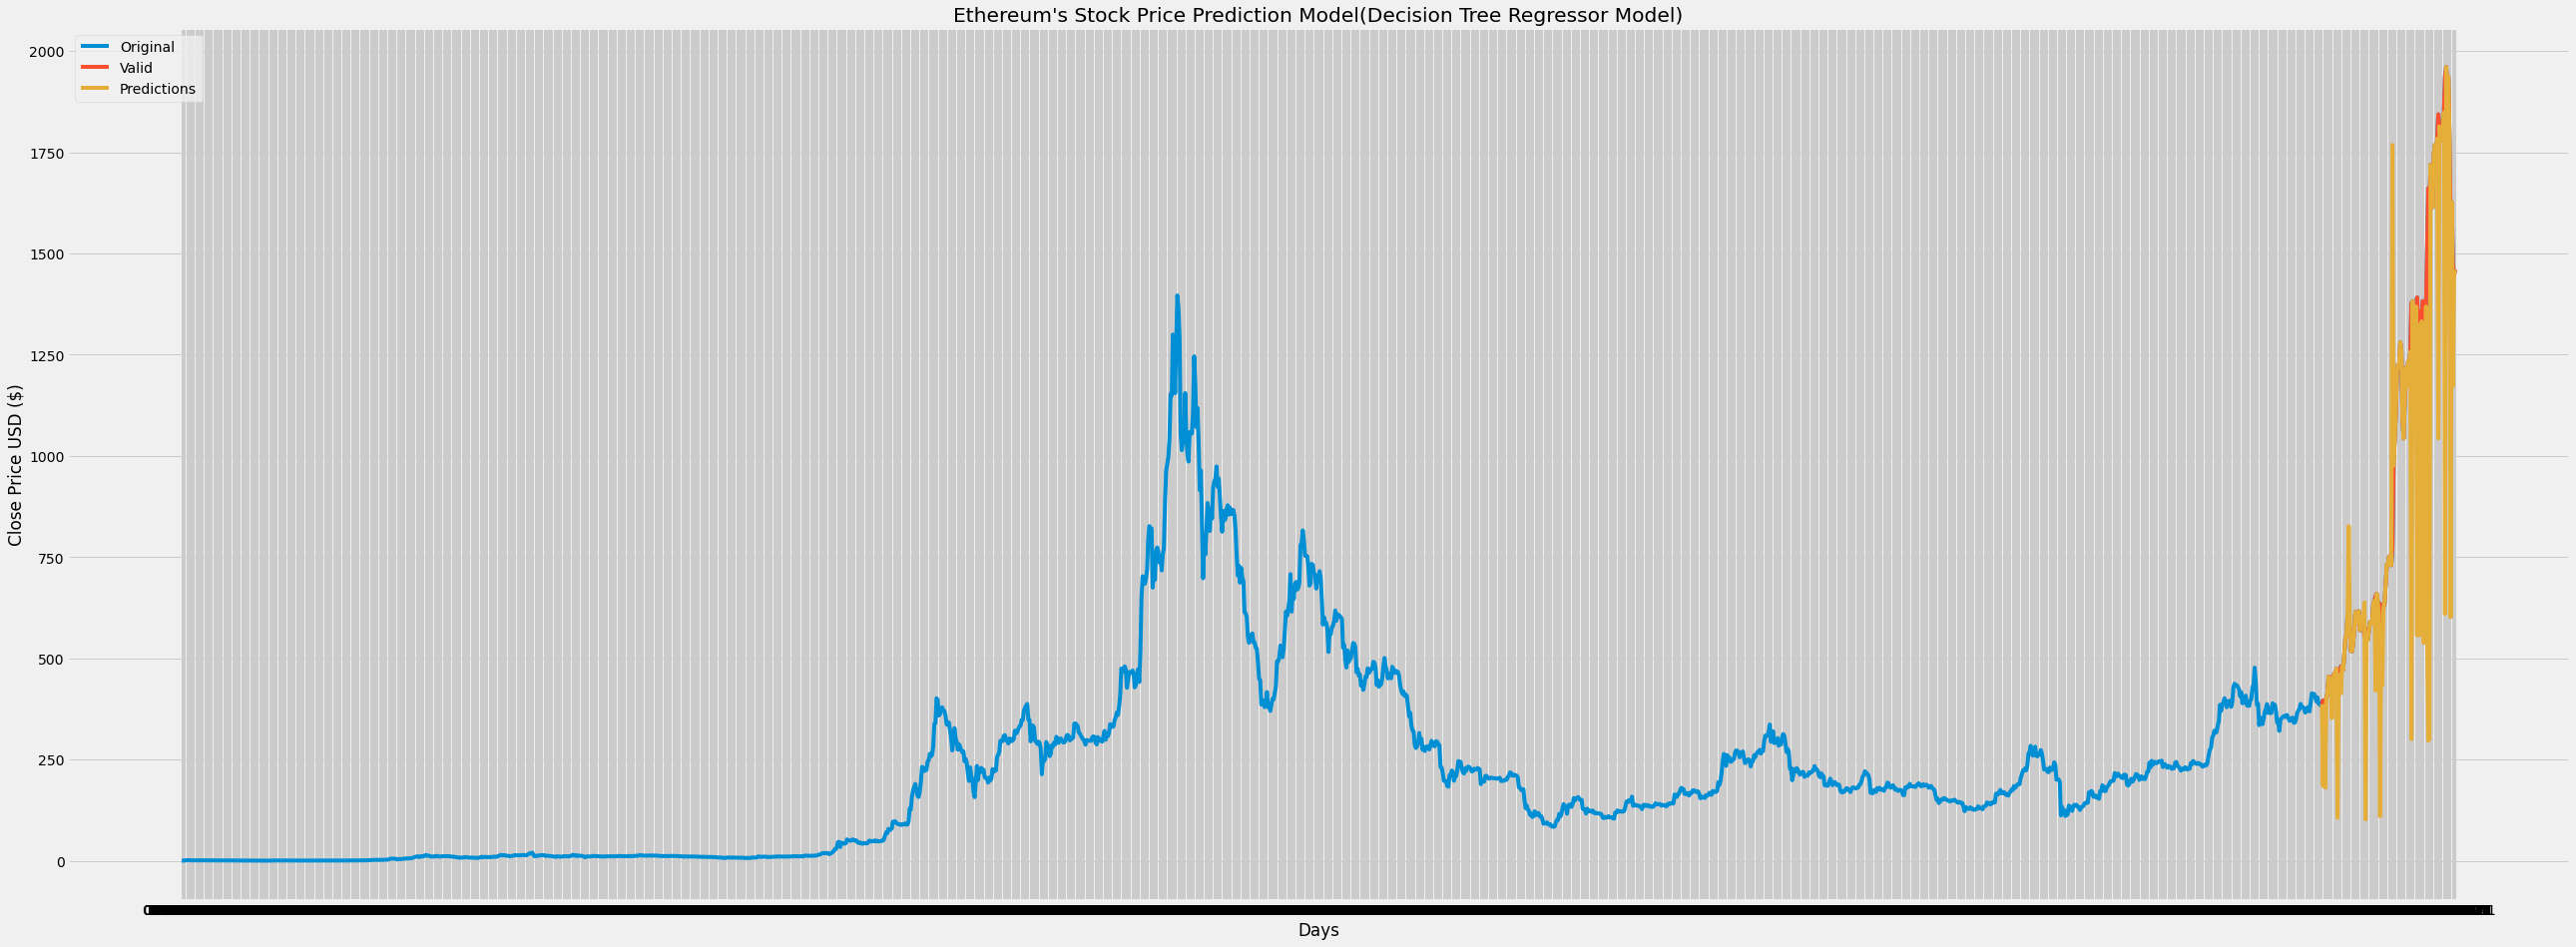

In [16]:
predictions = treePrediction
valid = eth[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(40,15))
plt.title("Ethereum's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(eth["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

<ipython-input-17-844f48cc22b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


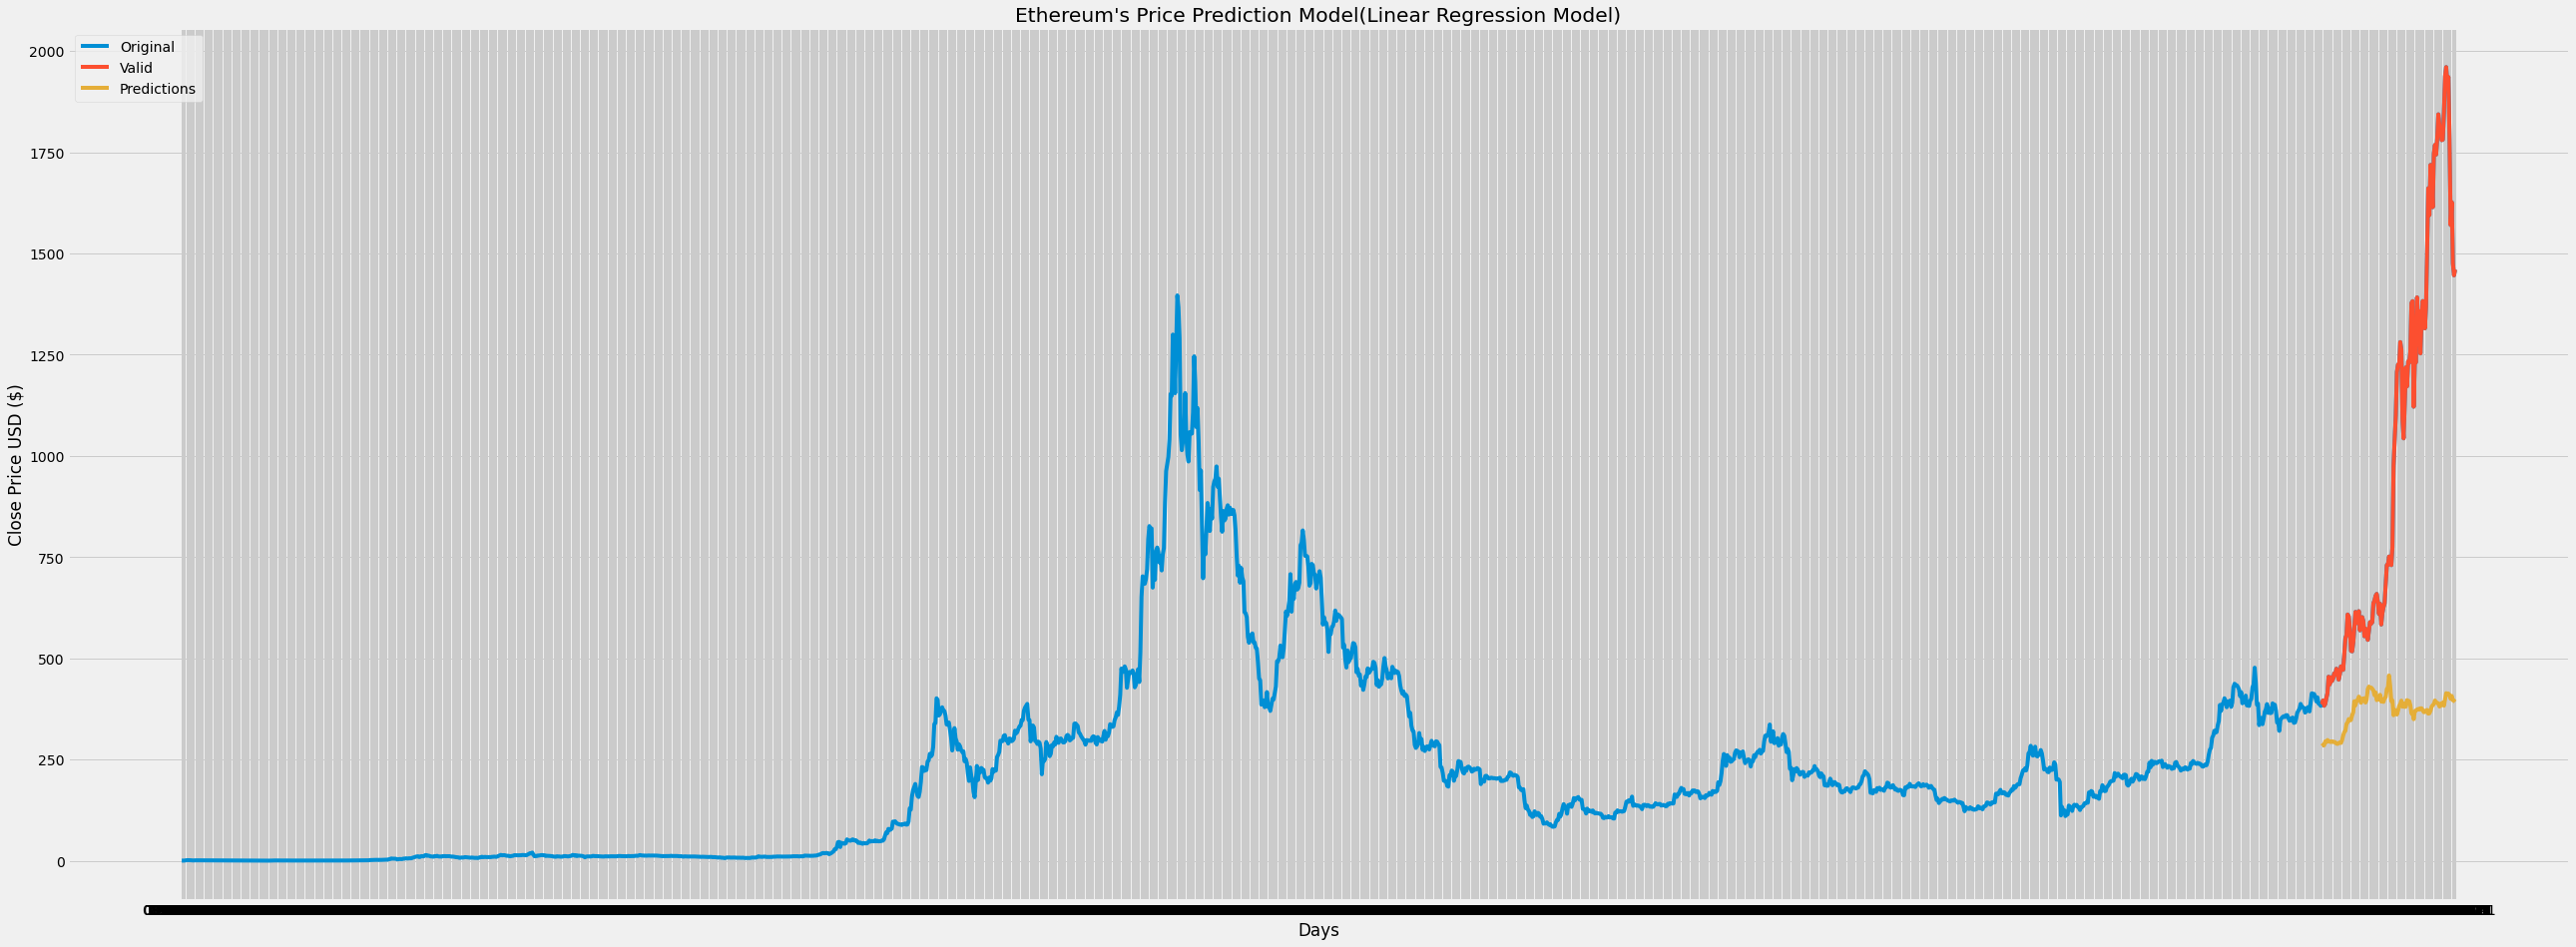

In [17]:
predictions = linearPrediction
valid = eth[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(40, 15))
plt.title("Ethereum's Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(eth["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

<ipython-input-18-66f497ce173a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


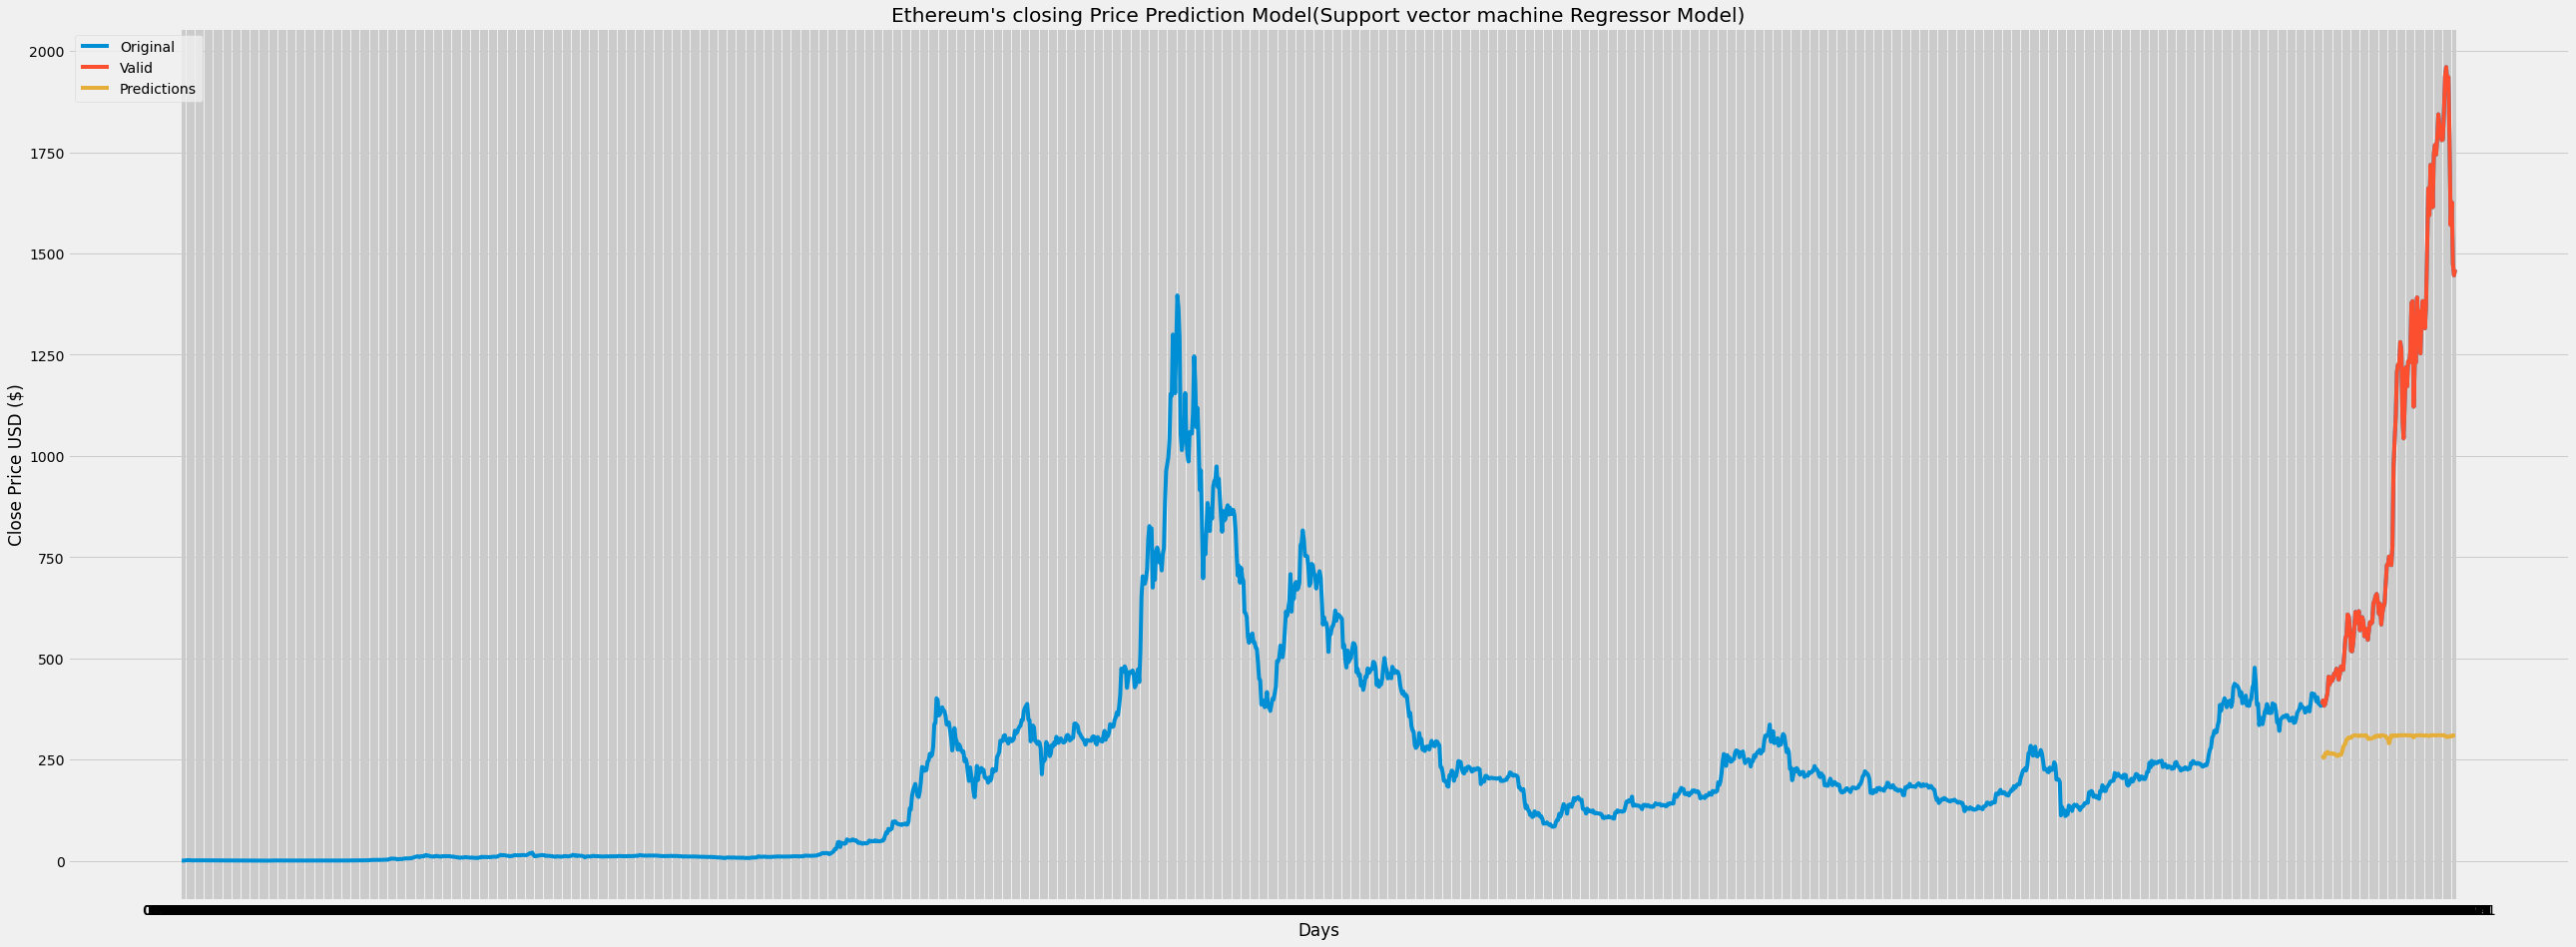

In [18]:
predictions =svmPrediction
valid = eth[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(40,15))
plt.title("Ethereum's closing Price Prediction Model(Support vector machine Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(eth["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, accuracy_score as asc,r2_score
from math import sqrt


In [20]:
mse = mean_squared_error(xfuture,svmPrediction)
rmse = sqrt(mse)
print('RMSE: ',rmse)
# since the rmse score depend upon the dependent varable and its range will in lieu to the variable 
#as we can see the value is not small but not that large in range 0 to 1 the model has average fit

RMSE:  70.45090828074855


In [21]:
mse = mean_squared_error(xfuture,treePrediction)
rmse = sqrt(mse)
print('RMSE:',rmse)
# since the rmse score depend upon the dependent varable its range will in lieu to the variable 
#as we can see the value is large in range 0 to 1 the model is not a good fit


RMSE: 709.0968097455503


In [22]:
mse = mean_squared_error(xfuture,linearPrediction)
rmse = sqrt(mse)
print('RMSE: ',rmse)
# since the rmse score depend upon the dependent varable its range will in lieu to the variable 
#as we can see the value is small in range 0 to 1 the model has a good fit

RMSE:  26.508919566230386
